In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("BigBasket_Products.csv")

# Preview the data
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [5]:
# 📌 Step 3: Clean & Prepare the Data

# Check necessary columns
print(df[['brand', 'sale_price', 'category']].isnull().sum())

# Drop rows with missing key data
df = df.dropna(subset=['sale_price', 'category'])

# Ensure sale_price is numeric
df['sale_price'] = pd.to_numeric(df['sale_price'], errors='coerce')
df = df.dropna(subset=['sale_price'])

# Create branded/unbranded column
df['is_branded'] = df['brand'].notnull()


brand         0
sale_price    0
category      0
dtype: int64


In [7]:
# 📌 Step 4: Mean, Median, Std Deviation by Category

category_stats = df.groupby('category')['sale_price'].agg(['mean', 'median', 'std']).reset_index()
print(category_stats.sort_values(by="mean", ascending=False))


                    category        mean  median         std
0                  Baby Care  535.169409  319.33  536.437682
9     Kitchen, Garden & Pets  507.862527  299.00  717.332260
2           Beauty & Hygiene  418.972981  245.00  590.487053
8       Gourmet & World Food  320.308283  239.20  406.449998
5          Eggs, Meat & Fish  290.208198  230.00  230.886872
3                  Beverages  240.177832  176.40  257.438769
4       Cleaning & Household  226.431741  159.00  251.421205
6   Foodgrains, Oil & Masala  192.250844  100.00  274.208157
1      Bakery, Cakes & Dairy  142.802750  109.00  131.119098
10    Snacks & Branded Foods  129.621429   87.12  142.301198
7        Fruits & Vegetables   50.903525   32.00   54.308877


In [9]:
# 📌 Step 5: T-Test – Branded vs Unbranded

branded_prices = df[df['is_branded']]['sale_price']
unbranded_prices = df[~df['is_branded']]['sale_price']

# Independent t-test
t_stat, p_val = ttest_ind(branded_prices, unbranded_prices, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

if p_val < 0.05:
    print("Significant difference in average prices (Branded vs Unbranded).")
else:
    print("No significant difference in average prices.")


T-Statistic: nan
P-Value: nan
No significant difference in average prices.


In [11]:
# 📌 Step 6: ANOVA – Price variation across categories

# Group sale prices by category
groups = [group['sale_price'].values for name, group in df.groupby('category') if len(group) > 10]

# One-way ANOVA test
f_stat, p_val = f_oneway(*groups)

print("F-Statistic:", f_stat)
print("P-Value:", p_val)

if p_val < 0.05:
    print(" Significant price variation across categories.")
else:
    print(" No significant variation in prices across categories.")


F-Statistic: 214.72278180822215
P-Value: 0.0
 Significant price variation across categories.


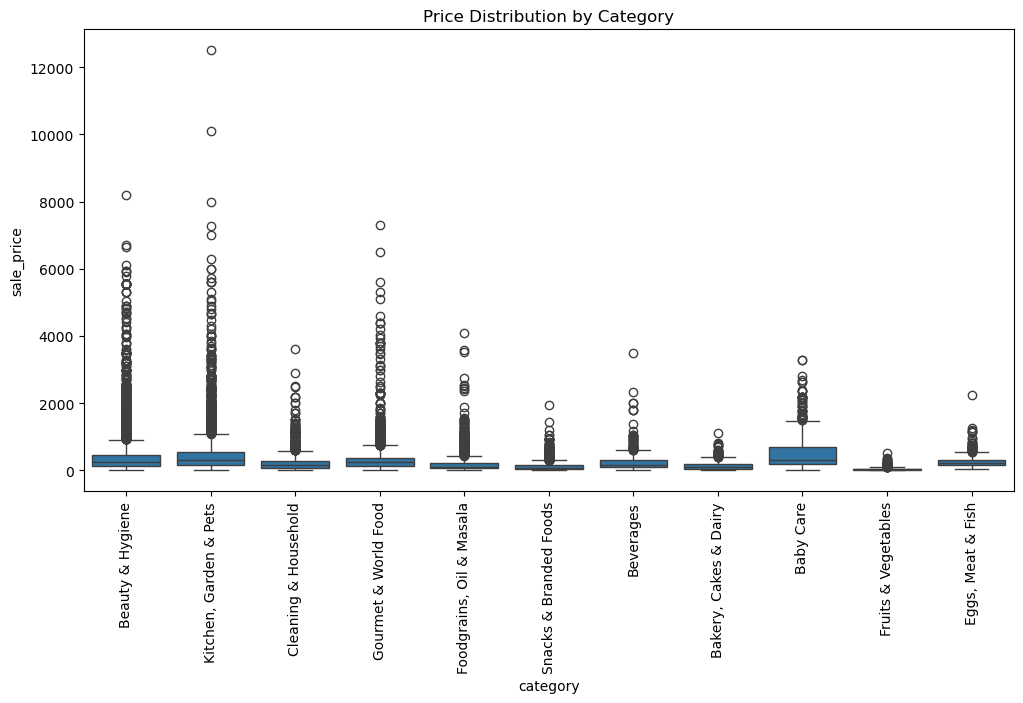

In [13]:
# 📌 Step 7: Visualization (Optional)

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='category', y='sale_price')
plt.xticks(rotation=90)
plt.title("Price Distribution by Category")
plt.show()
